In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Data

In [2]:
df = pd.read_csv("binary_class_data1.csv",sep=",")

In [3]:
df.head()

,x1 values,x2 values,target values
0,2.133086,0.184238,1
1,1.733531,-1.013260,1
2,4.658049,1.220892,1
3,1.164643,0.096678,1
4,5.655043,-2.239823,0


In [4]:
x=df.values[:,0:2]
y=df.values[:,2]

In [5]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=21,test_size=0.25)

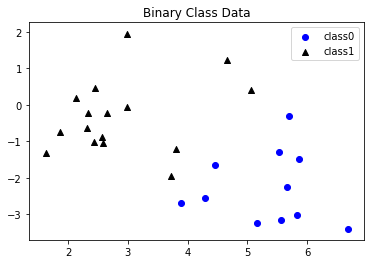

In [7]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='b',marker='o',label='class0')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='k',marker='^',label='class1')

plt.legend()
plt.title('Binary Class Data')
plt.show()

### Logistic Regression

In [8]:
#define model
logReg=LogisticRegression(C=1.0) # C=parameter /inverse of regularization strength
                                 # 지정하지 않으면 defalut =1
                                 # C가 작으면 잘 안맞고 크면 클수록 잘맞음 (overfitting 가능성)
                                 # C의 범위는?

#default penalty=12
#apply various C values


In [9]:
#leraning
logReg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_train_proba=logReg.predict_proba(X_train) #?
print(y_train_proba)

[[0.16040595 0.83959405]
 [0.7881933  0.2118067 ]
 [0.22205203 0.77794797]
 [0.63841834 0.36158166]
 [0.79186771 0.20813229]
 [0.12732816 0.87267184]
 [0.29400259 0.70599741]
 [0.22854512 0.77145488]
 [0.42179667 0.57820333]
 [0.39082951 0.60917049]
 [0.2872023  0.7127977 ]
 [0.65271991 0.34728009]
 [0.50376494 0.49623506]
 [0.89839911 0.10160089]
 [0.3759228  0.6240772 ]
 [0.04780578 0.95219422]
 [0.38859274 0.61140726]
 [0.23992103 0.76007897]
 [0.35445105 0.64554895]
 [0.93664586 0.06335414]
 [0.25189886 0.74810114]
 [0.89337102 0.10662898]
 [0.62581149 0.37418851]
 [0.68398616 0.31601384]
 [0.80055273 0.19944727]
 [0.89489722 0.10510278]
 [0.13937265 0.86062735]]


In [12]:
train_error=-np.mean(y_train*np.log(y_train_proba[:,1])+(1-y_train)*np.log(1-y_train_proba[:,1]))

print(train_error)

0.33991791366260304


In [13]:
#prediciton
y_train_pred=logReg.predict(X_train)
print(y_train_pred-y_train)

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0. -1. -1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [14]:
#for the test set
y_test_proba=logReg.predict_proba(X_test)
print(y_test_proba)
test_error=-np.mean(y_test*np.log(y_test_proba[:,1])+(1-y_test)*np.log(1-y_test_proba[:,1]))
print(test_error)

[[0.35072712 0.64927288]
 [0.33203146 0.66796854]
 [0.94042798 0.05957202]
 [0.90060422 0.09939578]
 [0.13872931 0.86127069]
 [0.63040923 0.36959077]
 [0.2983549  0.7016451 ]
 [0.92555724 0.07444276]
 [0.75271405 0.24728595]]
0.2586683617898538


In [15]:
y_test_pred=logReg.predict(X_test)
print(y_test_pred)
print(y_test_pred-y_test)

[1. 1. 0. 0. 1. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
#Attributes
print(logReg.coef_) #계수
print(logReg.intercept_) #Y절편

[[-0.25615684  0.88396689]]
[2.03875516]


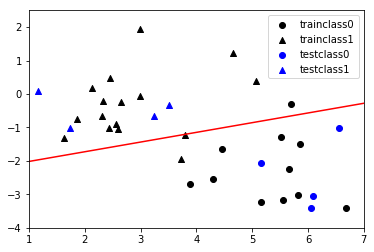

In [19]:
m=-logReg.coef_[0,0]/logReg.coef_[0,1] #기울기?
b=-logReg.intercept_/logReg.coef_[0,1] #계수?

xval=np.linspace(1,7,101)
yval=m*xval+b

#graph
plt.plot(xval,yval,color='r')

plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='k', marker='o',label='trainclass0')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], color='k',marker='^',label="trainclass1")
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],color='b',marker='o',label='testclass0')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],color='b',marker='^', label='testclass1')

plt.xlim([1,7])
plt.ylim([-4,2.5])
plt.legend()

plt.show()